In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
import scipy.stats as st #for statistical test

In [3]:
# import dataset using pandas
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# check statistic descriptive of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


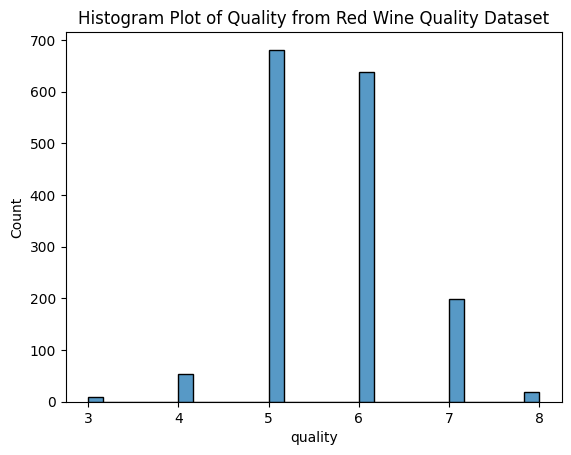

In [7]:
# create histplot
sns.histplot(data=df, x="quality")

# create title
plt.title('Histogram Plot of Quality from Red Wine Quality Dataset')
plt.show()

In [8]:
# Count the occurrences of unique values in quality
value_counts = df['quality'].value_counts()

# Print the value counts
print(value_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


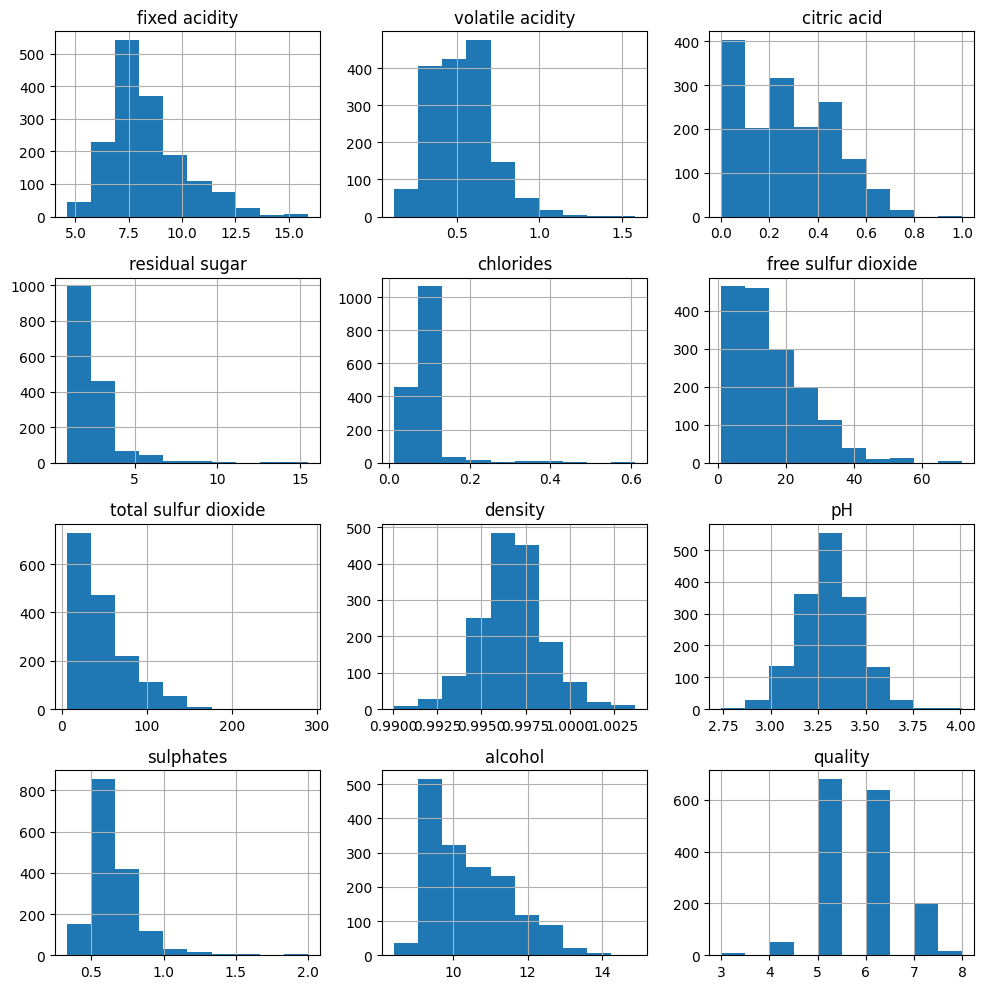

In [15]:
# Plot histograms for all features
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [10]:
# Check the probability distribution of the "quality" column
quality_distribution = df['quality'].value_counts(normalize=True)

# Print the probability distribution
print(quality_distribution)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


<Axes: >

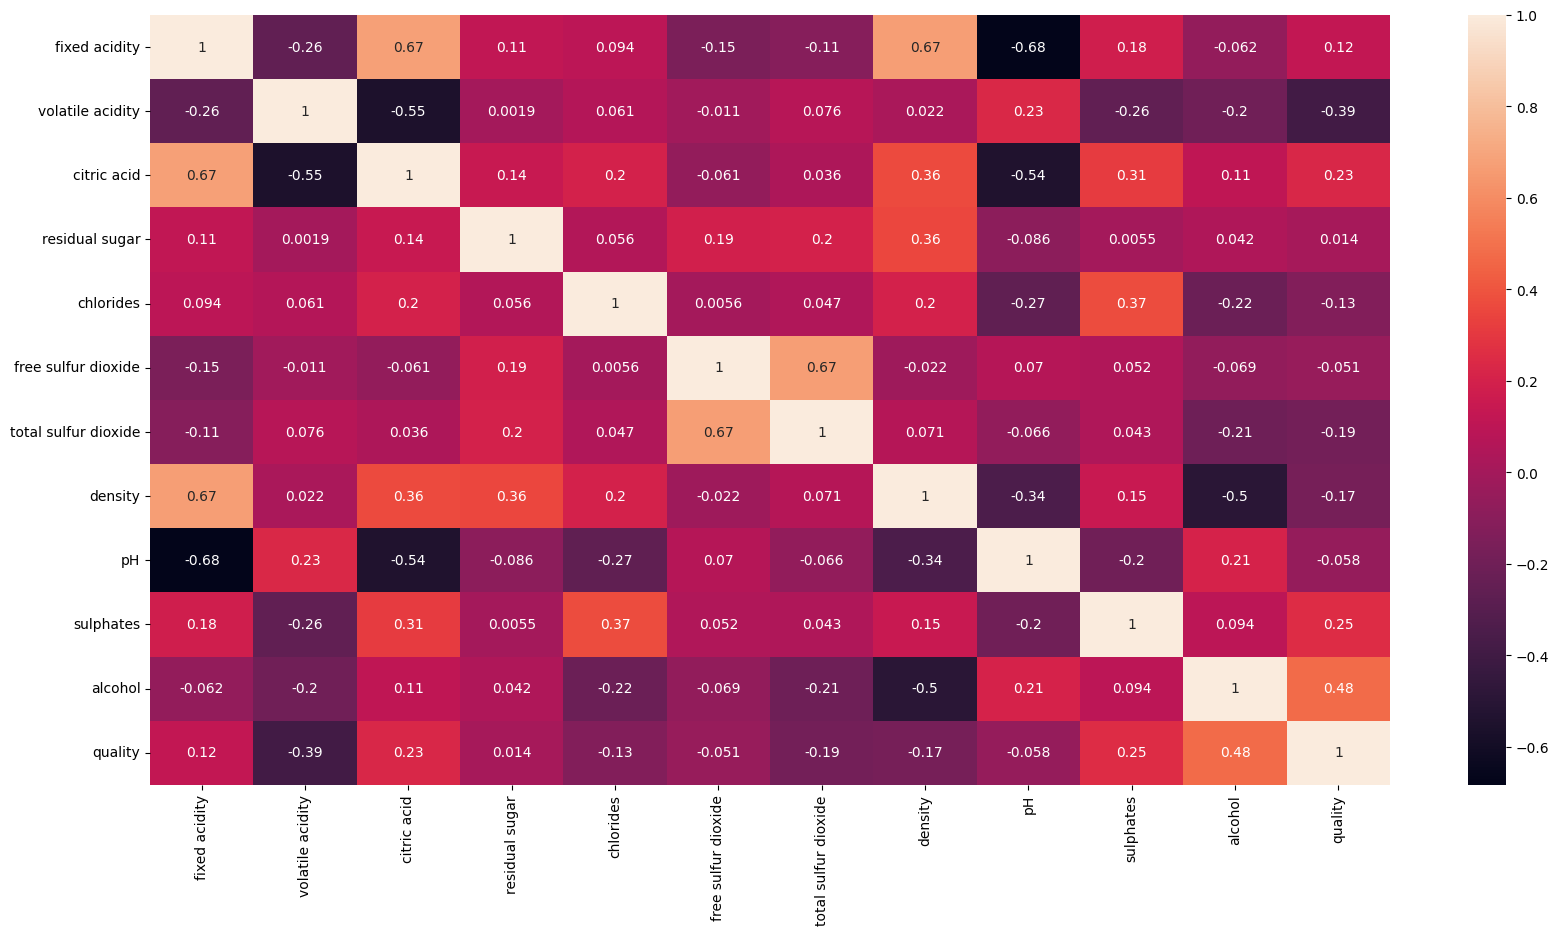

In [9]:
# check correlation among variables
corr = df.corr()

# creat heatmap of correlation
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

In [11]:
# Count instances where residual sugar > 2.6 and quality is 8
residual_sugar = len(df[(df['residual sugar'] > 2.6) & (df['quality'] == 8)])

# Count instances where quality is 8
high_quality = len(df[df['quality'] == 8])

# Count instances where residual sugar > 2.6 and quality is 8
residual_sugar2 = len(df[(df['residual sugar'] > 2.6) & (df['quality'] == 3)])

# Count instances where quality is 8
low_quality = len(df[df['quality'] == 3])

# Calculate probability
probability_residual_sugar = residual_sugar / high_quality
probability_residual_sugar2 = residual_sugar2 / low_quality

# Print result
print(f"Comparison of probability good quality wine and low quality wine with residual sugar > 2.6: {probability_residual_sugar} vs {probability_residual_sugar2} ")

Comparison of probability good quality wine and low quality wine with residual sugar > 2.6: 0.2222222222222222 vs 0.3 


In [12]:
# Count instances where chlorides > 0.09 and quality is 8
chlorides = len(df[(df['chlorides'] > 0.09) & (df['quality'] == 8)])
print(chlorides)

# Count instances where chlorides > 0.09 and quality is 3
chlorides2 = len(df[(df['chlorides'] > 0.09) & (df['quality'] == 3)])
print(chlorides2)

# Calculate probability
probability_chlorides = chlorides / high_quality
probability_chlorides2 = chlorides2 / low_quality

# Print result
print(f"Comparison of probability good quality wine and low quality wine with chlorides > 0.09: {probability_chlorides} vs {probability_chlorides2} ")

0
5
Comparison of probability good quality wine and low quality wine with chlorides > 0.09: 0.0 vs 0.5 


In [13]:
# Select the subset of wines with quality 8 and density values
subset = df[df['quality'] == 8]['density']

# Perform one-sample t-test
t_stat, p_value = st.ttest_1samp(subset, 0.996)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.4053283268082823
p-value: 0.17793518551763252


In [14]:
# Select the subset of wines with quality 8 and pH values
subset = df[df['quality'] == 8]['pH']

# Perform one-sample t-test
t_stat, p_value = st.ttest_1samp(subset, 3.31)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -0.9045576938505593
p-value: 0.3783406623776765
